# Kaggle Taxi Fare

## 1.Data preparation and cleaning

## Imports  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import os,glob

## Loading DataSet

In [3]:
# reading the data
df = pd.read_csv(r'C:/Users/Hen/workshop/kaggle_dateset/train.csv')

## Data Understanding

In [6]:
# understanding data types
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [8]:
# undestanding year range
df['pickup_datetime'].min()

'2009-01-01 00:00:27 UTC'

In [9]:
# undestanding year range
df['pickup_datetime'].max()

'2015-06-30 23:59:54 UTC'

## Removing Records with Missing Values

In [4]:
np.sum(df.isnull())

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
np.sum(df.isnull())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Data Statistics (on 0.1% of the data)

In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07
mean,1.134500e+01,-7.250973e+01,3.991982e+01,-7.251121e+01,3.992068e+01,1.685391e+00
std,2.071087e+01,1.284878e+01,9.642324e+00,1.278220e+01,9.633346e+00,1.327662e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [7]:
# sampling data for statistics
s_df = df.sample(frac=0.001)

In [8]:
# extracting float values from timestamp
s_df['pickup_day_of_week'] = pd.to_datetime(s_df['pickup_datetime']).dt.dayofweek
print('finished day of week')
s_df['month'] =  pd.to_datetime(s_df['pickup_datetime']).dt.month
print('finished month')
s_df['hour_in_seconds'] =  pd.to_datetime(s_df['pickup_datetime']).dt.hour #should have been in seconds but didnt work
print('finished hour')
s_df['season'] = (s_df['month']%12 + 3)//3
print('finished season')

finished day of week
finished month
finished hour
finished season


In [9]:
s_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_day_of_week', 'month', 'hour_in_seconds',
       'season'],
      dtype='object')

In [10]:
s_df.dtypes

key                    object
fare_amount           float64
pickup_datetime        object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
pickup_day_of_week      int64
month                   int64
hour_in_seconds         int64
season                  int64
dtype: object

In [11]:
s_df.head(30)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,month,hour_in_seconds,season
11886041,2012-11-18 20:54:38.0000001,7.5,2012-11-18 20:54:38 UTC,-73.954095,40.778957,-73.975145,40.790077,1,6,11,20,4
17052167,2012-01-09 15:30:20.0000004,5.3,2012-01-09 15:30:20 UTC,-73.967784,40.766136,-73.966803,40.757162,1,0,1,15,1
12419724,2011-03-23 09:23:58.0000007,11.3,2011-03-23 09:23:58 UTC,-73.978274,40.772913,-73.969596,40.750906,1,2,3,9,2
20207192,2014-11-11 13:30:00.00000055,19.5,2014-11-11 13:30:00 UTC,-73.979825,40.781135,-73.969740,40.762002,1,1,11,13,4
28407438,2010-07-24 10:21:09.0000002,8.1,2010-07-24 10:21:09 UTC,-73.985113,40.763529,-73.955920,40.774805,1,5,7,10,3
19632170,2011-10-02 16:24:21.0000001,3.7,2011-10-02 16:24:21 UTC,-73.978763,40.767064,-73.982283,40.770982,2,6,10,16,4
17911288,2014-10-28 09:03:00.000000204,26.5,2014-10-28 09:03:00 UTC,-73.971180,40.797897,-74.004782,40.721530,1,1,10,9,4
3731765,2014-09-12 12:44:00.0000006,4.5,2014-09-12 12:44:00 UTC,-73.982310,40.745707,-73.976363,40.753517,1,4,9,12,4
23790289,2010-01-12 06:55:00.000000108,4.9,2010-01-12 06:55:00 UTC,-73.982347,40.762268,-73.992052,40.749220,1,1,1,6,1
11397990,2011-03-15 08:27:00.000000109,14.5,2011-03-15 08:27:00 UTC,-73.988073,40.737757,-73.976992,40.788532,1,1,3,8,2


### Fare Amount Histogram

In [20]:
%matplotlib inline

C:\Users\Hen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


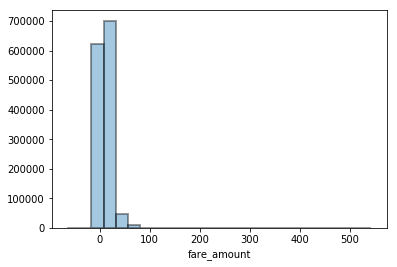

In [21]:
# Plot without limitations
sns.distplot(s_df.fare_amount, bins = 25, kde = False , hist_kws=dict(edgecolor="k", linewidth=2))

C:\Users\Hen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


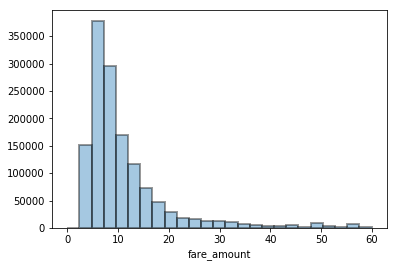

In [22]:
# 0 < fare amount < 60
data_fare = s_df[s_df['fare_amount'] < 60]
data_fare = data_fare[data_fare['fare_amount'] > 0]
sns.distplot(data_fare.fare_amount, bins = 25, kde = False , hist_kws=dict(edgecolor="k", linewidth=2))

### Passenger Count vs Fare Amount

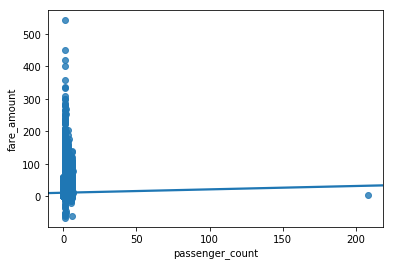

In [23]:
sns.regplot(x = 'passenger_count',y = 'fare_amount', data = s_df)

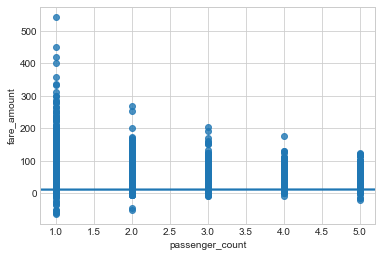

In [34]:
# 0 < passenger count < 6
data_pass_count = s_df[s_df['passenger_count'] < 6]
data_pass_count = data_pass_count[data_pass_count['passenger_count'] > 0]
sns.regplot(x = 'passenger_count',y = 'fare_amount', data = data_pass_count)

fare_amount    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

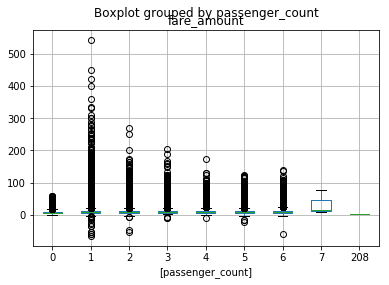

In [24]:
s_df[['passenger_count','fare_amount']].boxplot(by='passenger_count', return_type = 'axes')

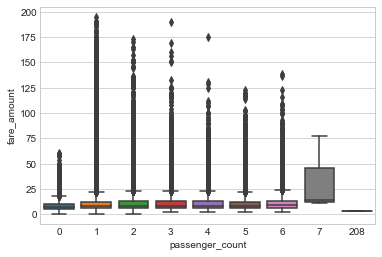

In [25]:
sns.set_style("whitegrid")
fareData = s_df[s_df['fare_amount'] < 200 ]
fareData = fareData[fareData['fare_amount'] > 0 ]
ax = sns.boxplot(x="passenger_count", y="fare_amount", data=fareData)

### Season vs Fare Amount

fare_amount    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

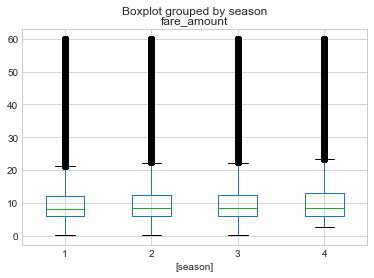

In [26]:
data_fare[['season','fare_amount']].boxplot(by='season', return_type = 'axes')

### Month vs Fare Amount

In [27]:
print('Month and fare ')
for month in s_df['month'].unique():
    fare = s_df[s_df['month'] == month].fare_amount
    print('Month: {0}, Mean Fare {1}'.format(month,fare.mean()))
    #print(trip_dist.describe())

Month and fare 
Month: 6, Mean Fare 11.59286365814726
Month: 10, Mean Fare 11.593383406971368
Month: 1, Mean Fare 10.711819986494662
Month: 3, Mean Fare 11.180873590175132
Month: 2, Mean Fare 10.874905749455129
Month: 12, Mean Fare 11.554020492343797
Month: 11, Mean Fare 11.532345556625193
Month: 5, Mean Fare 11.628708151160748
Month: 9, Mean Fare 11.741544557826334
Month: 7, Mean Fare 11.120266976592731
Month: 4, Mean Fare 11.322736900736967
Month: 8, Mean Fare 11.190919382194188


### Day of the Week vs Fare Amount

fare_amount    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

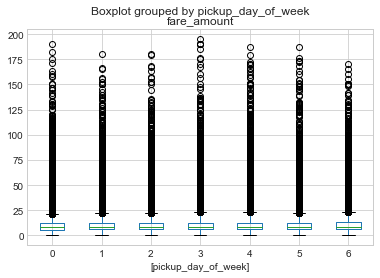

In [28]:
fareData[['pickup_day_of_week','fare_amount']].boxplot(by='pickup_day_of_week', return_type = 'axes')

In [31]:
print('Day of the week and fare amount')
for day in s_df['pickup_day_of_week'].unique():
    fare = s_df[s_df['pickup_day_of_week'] == day].fare_amount
    print('Day of the week: {0}, Mean Fare {1}'.format(day,fare.mean()))

Day of the week and fare amount
Day of the week: 3, Mean Fare 11.457842364057722
Day of the week: 1, Mean Fare 11.197732925818187
Day of the week: 0, Mean Fare 11.32395569834378
Day of the week: 6, Mean Fare 11.65154136559071
Day of the week: 5, Mean Fare 10.985575257810716
Day of the week: 4, Mean Fare 11.431419388742162
Day of the week: 2, Mean Fare 11.318434389590236


### Hour of the Day vs Fare Amount

fare_amount    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

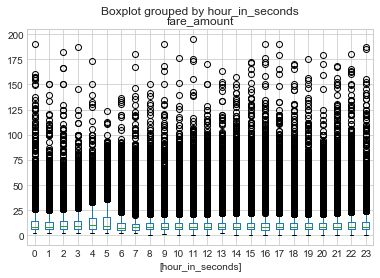

In [29]:
fareData[['hour_in_seconds','fare_amount']].boxplot(by='hour_in_seconds', return_type = 'axes')

In [33]:
print('hour and fare amount')
for hour in s_df['hour_in_seconds'].unique():
    fare = s_df[s_df['hour_in_seconds'] == hour].fare_amount
    print('Hour: {0}, Mean Fare {1}'.format(hour,fare.mean()))

hour and fare amount
Hour: 11, Mean Fare 11.096972926715216
Hour: 20, Mean Fare 10.714705586619388
Hour: 9, Mean Fare 10.90935040464564
Hour: 21, Mean Fare 11.039292211947298
Hour: 6, Mean Fare 12.088229666760718
Hour: 15, Mean Fare 11.994641302716337
Hour: 13, Mean Fare 11.48702257754063
Hour: 8, Mean Fare 10.88170346402736
Hour: 14, Mean Fare 11.82635495611194
Hour: 10, Mean Fare 10.93086621690415
Hour: 12, Mean Fare 11.140054336652032
Hour: 19, Mean Fare 10.53101137756379
Hour: 16, Mean Fare 12.023070753565452
Hour: 18, Mean Fare 10.90414032001526
Hour: 22, Mean Fare 11.361311869293637
Hour: 7, Mean Fare 10.994519433924594
Hour: 17, Mean Fare 11.484451276236832
Hour: 0, Mean Fare 11.727687750287904
Hour: 3, Mean Fare 11.775886572820786
Hour: 23, Mean Fare 11.640325616854023
Hour: 1, Mean Fare 11.319757875231682
Hour: 2, Mean Fare 11.457497705820634
Hour: 4, Mean Fare 13.619790175567369
Hour: 5, Mean Fare 15.050134886120672


## Correlations

In [15]:
print('Correlations:')
columns = ['hour_in_seconds','month','pickup_day_of_week','season','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
for col_name in columns:
    corr = s_df['fare_amount'].corr(s_df[col_name])
    print('Column Name: {0}, Pearson {1}'.format(col_name,corr))


Correlations:
Column Name: hour_in_seconds, Pearson -0.019305810076798
Column Name: month, Pearson 0.023318472366817375
Column Name: pickup_day_of_week, Pearson 0.007292070758918055
Column Name: season, Pearson 0.02076904979565973
Column Name: pickup_longitude, Pearson 0.013311817327598053
Column Name: pickup_latitude, Pearson -0.014460537746507268
Column Name: dropoff_longitude, Pearson 0.017010396046213384
Column Name: dropoff_latitude, Pearson -0.01637589672041296
Column Name: passenger_count, Pearson 0.013978245494456223


## Object Types to Float

In [ ]:
###################### takes a lot of time! #######################
df['pickup_day_of_week'] = pd.to_datetime(df['pickup_datetime']).dt.dayofweek
df['pickup_day_of_month'] = pd.to_datetime(df['pickup_datetime']).dt.day
df['year'] = pd.to_datetime(df['pickup_datetime']).dt.year
df['month'] =  pd.to_datetime(df['pickup_datetime']).dt.month

#adding season column
#(4)Fall: September, October, November
#(1) Winter: December, January, February
#(2)Spring: March, April, May
#(3)Summer: June, July, August

df['season'] = (df['month']%12 + 3)//3

In [ ]:
def to_seconds(s): 
    hr, mn, sec = [float(x) for x in s.str.split(':')] 
    return hr*3600 + mn*60 + sec

df['hour_in_seconds'] =  to_seconds(pd.to_datetime(df['pickup_datetime']).dt.hour)

In [ ]:
df.head(25)

In [16]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [ ]:
df['year'].unique()

In [ ]:
# removing timestamp
df.drop(['pickup_datetime'], axis=1,inplace = True)

In [43]:
df.columns

Index(['DOLocationID', 'PULocationID', 'RatecodeID', 'VendorID', 'extra',
       'fare_amount', 'improvement_surcharge', 'mta_tax', 'passenger_count',
       'payment_type', 'store_and_fwd_flag', 'tip_amount', 'tolls_amount',
       'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
       'trip_distance', 'type', 'pickup_day_of_week', 'dropoff_day_of_week',
       'month', 'hour', 'season', 'Distance_Bins'],
      dtype='object')

df.dtypes

## Data Cleaning

In [ ]:
np.sum(train_data.isnull())

In [ ]:
# clear negative or 0-priced rides
df = df[df['fare_amount']>0]

## Split to Train, Validation and Test Sets

In [ ]:
# Split to total train set and test
msk = np.random.rand(len(df)) < 0.8
total_train_data = df[msk]
test_data = df[~msk]

# Split total train to train and validation set
msk = np.random.rand(len(total_train_data)) < 0.8
train_data = total_train_data[msk]
validation_data = total_train_data[~msk]

In [ ]:
# save files
File_Path = r'C:/Users/Hen/workshop/kaggle_dateset'
# Save train data
Train_File_Name = 'Taxi_Train_Data_Set.csv'
New_File_Path = os.path.join(File_Path, Train_File_Name)
train_data.to_csv(New_File_Path)

# Save validation data
Validation_File_Name = 'Taxi_validation_Data_Set.csv'
New_File_Path = os.path.join(File_Path, Validation_File_Name)
validation_data.to_csv(New_File_Path)

# Save test data
Test_File_Name = 'Taxi_Test_Data_Set.csv'
New_File_Path = os.path.join(File_Path, Test_File_Name)
test_data.to_csv(New_File_Path)

# Model

In [86]:
from sklearn.linear_model import LinearRegression
train_data.columns
Y_Label = train_data['fare_amount']
X_Label = train_data.drop(['fare_amount'], axis=1)

model = LinearRegression()
model.fit(X_Label,Y_Label)
print(model.score(X_Label,Y_Label))

0.02844895337012765


In [41]:
X_Label_Distance = train_data['trip_distance'].reshape(-1,1)
Y_Label = train_data['payment_amount']
model_distance = LinearRegression()
model_distance.fit(X_Label_Distance,Y_Label)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate Results

In [87]:
from sklearn import metrics
validation_class = test_data['fare_amount']
expected = validation_class.values
#oh_test_data= validation_data.drop(['fare_amount','total_amount','type', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag','payment_amount'], axis=1)
oh_test_data= test_data.drop(['fare_amount'], axis=1)
predicted = model.predict(oh_test_data)

#predicted_probs = model.predict_proba(oh_test_data)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(expected, predicted))
print(rms)

6.296923087610422
